## 加载手写数字数据集

In [1]:
from sklearn import datasets
import numpy as np
digits = datasets.load_digits()
X = digits.data
Y = digits.target

## 分割数据集

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=111)

## 在不进行PCA的情况下进行训练

In [10]:
%%time
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, Y_train)
print(KNeighborsClassifier.score(X_test, Y_test))

0.982222222222
Wall time: 83.7 ms


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_transform = pca.transform(X_train)
X_test_transform = pca.transform(X_test)

In [12]:
%%time
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train_transform, Y_train)
print(KNeighborsClassifier.score(X_test_transform, Y_test))

0.62
Wall time: 4.02 ms


## PCA中的一个指标，表示对于原数据的描述量

In [13]:
# 每一个维度表示描述了元数据的0.几，所有维度的和表达了与原数据的近似度
print(pca.explained_variance_ratio_)

[ 0.14889204  0.13725561]


## 寻找降维的具体数字可以先输出全部PCA成分，然后进行挑选

In [15]:
pca = PCA(X_train.shape[1])
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[  1.48892042e-01   1.37255610e-01   1.16360880e-01   8.40574584e-02
   5.96321419e-02   4.96117699e-02   4.45380548e-02   3.57809310e-02
   3.38633877e-02   3.02692020e-02   2.38256945e-02   2.25028207e-02
   1.81309401e-02   1.75318105e-02   1.43944923e-02   1.41867150e-02
   1.27496154e-02   1.18955784e-02   1.05814097e-02   9.11046830e-03
   9.03811665e-03   8.14307317e-03   7.75686510e-03   7.18199877e-03
   6.90274899e-03   5.79002524e-03   5.67201822e-03   5.22914711e-03
   4.72778435e-03   4.27382243e-03   3.81028776e-03   3.38120312e-03
   3.27564113e-03   3.21053686e-03   3.07924615e-03   2.87326532e-03
   2.46001091e-03   2.25898778e-03   2.16840529e-03   2.01401878e-03
   1.81727330e-03   1.52785555e-03   1.45952412e-03   1.39065574e-03
   1.14474418e-03   1.05236595e-03   9.36115680e-04   8.29998459e-04
   5.57045416e-04   4.16587503e-04   2.04456810e-04   8.25272284e-05
   5.14314889e-05   5.05703243e-05   4.14813361e-05   1.08337178e-05
   5.69864159e-06   1.01122361e-06

## 加入绘图类，用图描述

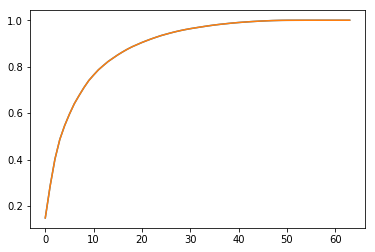

In [18]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

## PCA中自带的函数，可以自己抉择留多少维度

In [21]:
# 意思为保留原数据95%的信息
pca = PCA(0.95)
pca.fit(X_train)
X_train_transform = pca.transform(X_train)
X_test_transform = pca.transform(X_test)
print(X_train.shape)
print(X_train_transform.shape)
# 由输出可知，原有64个维度，在降维处理后只保留了28个维度
# 并且在此前提下保存了原有信息的95%

(1347, 64)
(1347, 28)


In [22]:
%%time
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train_transform, Y_train)
print(KNeighborsClassifier.score(X_test_transform, Y_test))

0.984444444444
Wall time: 28.1 ms


## 降维还有一个好处是，可以将多维数据转成2维，使之可以可视化

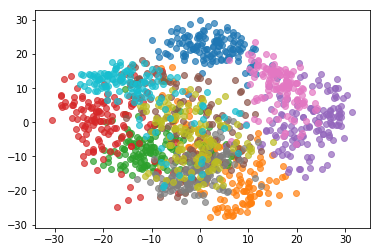

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_transform = pca.transform(X_train)
X_test_transform = pca.transform(X_test)
for i in range(10):
    plt.scatter(X_train_transform[Y_train == i,0], X_train_transform[Y_train == i,1], alpha=0.7)
plt.show()